# Just Enough Math
### Understanding Uncertainty

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Math Review: Why?
- Many students will have had some time away from math; it's nice to take a moment and remember some vocabulary and techniques
- One of the purposes of this course is to invest in your mathematical foundations, so that you're not running into a wall when unfamiliar concepts come up in the description of a model or algorithm
- Sadly, quantitative subjects are not just math-heavy, but **notation** heavy: Reading a paper from Arxiv requires following non-phonetic symbols whose meanings are taken for granted
- In order to be able to read and understand papers and books, there some key notation and ideas you need to be fluent... or at least aware they exist
- I imagine that this set of notes is also a crib sheet for this course and others

# 1. Logic

## Logic
- Let's start with the fundamentals of thinking quantitatively
- A **proposition** is a statement that is either true or false: "The square root of 2 is divisible by 7" (false) or "7 is a prime number" (true). 
- The negation of a proposition $P$ insists the opposite of true: The negation of "The square root of 2 is NOT divisible by 7", which is true
- If a proposition depends on context $x$, we often write $P(x)$, which takes the Boolean values ```True``` or ```False```
- We often make claims, that **$P$ implies $Q$** or $P \rightarrow Q$. This is the core of any mathematical subject: Working from a set of axioms/propositions to discover their implications.
    - "If (the true data generating process is linear), then (OLS is unbiased)"
    - "If ($x^*$ is an optimizer of a differentiable function $f(x)$), then ($f'(x^*)=0$)"

## Exercises
- Is "colorless green ideas sleep furiously" a proposition? Is "this sentence is a lie" a proposition?
- Imagine we fix a set of axioms. Can all the propositions that can be posed within that axiomatic system be shown to be true or false?

## Logical Reasoning
- Syllogism: If $A \rightarrow B$, and $B \rightarrow C$, then it follows that $A \rightarrow C$
- Converse: If $P \rightarrow Q$ it is typically not the case that **the converse** $Q \rightarrow P$ is true: This is the converse of a statement
    - "If a number is divisible by 4, then it is even" is a true statement. But not all even numbers are divisible by 4. 
    - Exercise: Is the converse of, "If $f'(x^*)=0$, then $x^*$ is an optimizer of a differentiable function $f(x)$" true?
- Contrapositive: If $P \rightarrow Q$, then it must the the case that **the contrapositive**, not $Q$ implies not $P$, is true
    - "If a number is not divisible by 2, then it is not divisible by 4"
    - Exercise: What's the contrapositive of: "If $x^*$ is an optimizer of $f(x)$ and $f(x)$ is differentiable at $x^*$, then $f'(x^*)=0$."
- A **counter-example** is a case $x'$ for which $P$ is false
    - Exercise: "All continuous functions are differentiable." What is a counterexample?
- Very smart people make (often tragic) elementary logical errors all the time

# 2. Set Theory

## Sets
- A set is a collection of objects
- We can define a set by writing down its elements explicitly: $A = \{ a, b, c, ... z\}$
- The empty set $\varnothing$ is the set with no elements; it's useful for thinking about edge cases
- To assert that an object $x$ is an element of a set $A$, we write $x \in A$
- Mostly, we write $A = \{ x: \text{the proposition } P(x) \text{ is true } \}$, where $:$ means "such that". This is called **set builder** notation

## Exercises
- Plot the following sets: 
    - $A = \{x: x^4 -1 \ge 0 \}$ 
    - $B = \{ (x,y): 3x -2y \ge 0 \}$
    - $C = \{ (x,y): xy \ge 3 \}$
    - $D = \{ (x_1,x_2): x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$
- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$?

## Set Operations
- If we want to assert that $x$ is in a set $A$, we often write $x \in A$
- What can we do with two sets, $A$ and $B$?
- The **union**: $A \cup B = \{ x: x \in A \text{ or } x \in B \}$
- The **intersection**: $A \cap B = \{x : x \in A \text{ and } x \in B \}$
- The **complement**: $ A \backslash B = \{ x : x \in A \text{ and } x \notin B \}$
- The **symmetric difference**: $ A \Delta B = \{ x: x \in A \text { and } x \notin B, \text{ or } x \in B \text{ and } x \notin A \}$

## Exercises
State these relations in words, and show they're true (venn diagrams can be useful to sketch your intuition):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ A \Delta B  = (A \backslash B) \cup (B \backslash A)$
- $ A \backslash (B \cup C) = (A \cup B) \cap (A \cup C)$
- $ (A \cup B)^c = A^c \cap B^c $, $ (A\cap B)^c = A^c \cup B^c$
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- If $A_i \subseteq B_i$ for $i = 1, ..., N$, then $ \cap_{i=1}^N A_i \subseteq \cap_{i=1}^N B_i$ and $ \cup_{i=1}^N A_i \subseteq \cup_{i=1}^N B_i$

Hint: Sometimes to show that $A = B$, it's easier to show that $ A \subseteq B$ and $B \subseteq A$

## Sets of Numbers
- There are some important sets of numbers:
    - The set of natural numbers, $\mathbb{N} = \{ 1, 2, 3, ... \} $
    - The set of integers, $\mathbb{Z} = \{ ... , -3, -2, -1, 0, 1, 2, 3, ... \} $
    - The set of rational numbers, $\mathbb{Q} = \{ q : q = n/m, \text{ such that } n,m \in \mathbb{Z} \}$
    - The set of real numbers, $\mathbb{R} = (-\infty, \infty)$
- Are there real numbers that aren't rational? Why do we need real numbers?
    - We are particularly interested in real numbers, but they're an abstraction
    - In stats, we often describe a variable as **numeric** which takes very finely distinguished values, like money or temperature or kilograms, and **categorical** otherwise 
    - In CS, we often consider any floating point number as being an approximation of a real number

## Direct Products
- Consider a stochastic process like a stock price, where every nanosecond we get a new measurement of its price. These data live in $\mathbb{R}^{1,000,000,000}$ per second. Or, an ECG gathers $\mathbb{R}^{256}$ per second. 
- Modeling the evolution of stochastic processes in situations like these benefits from some notation to communicate ideas. How do we use all that data to make predictions? How do we reduce and store all that data meaningfully?
- For $\mathbb{R}^N$ as $N$ gets large or goes to $\infty$, your basic quantitative intuitions probably break down in surprising ways.

# 3. Functions

## Functions
- A function $f$ is a rule that assigns a single element $y \in Y$ to every element $x \in X$, and we write $f: X \rightarrow Y$ and $f(x) = y$
- The set $X$ is called the **domain** and the set $Y$ is the **range**
- If $Y = \mathbb{R}$, then a function $f:X \rightarrow \mathbb{R}$ is called a real-valued function

## Exercises
Are the following things functions? Why or why not? If they are, what are their domains and ranges? 

- The solution to the quadratic equation, $ax^2 + bx + c = 0$?
- The inverse of a function $f$ is defined as $f^{-1}(y) = \{ x: f(x) =y \}$. In general, when is $f^{-1}(y)$ a function?

A "function" that maps points $x \in X$ to *subsets* of $Y$ is called a multi-function or correspondence. They're interesting. There's nothing wrong with them. They're really common in optimization and game theory. They have concepts of continuity and differentiability associated with them.

## Absolute Value
- The absolute value function is
$$
|x| = \sqrt{x^2}= \begin{cases}
-x, & x < 0\\
0, & x = 0 \\
x, & x > 0
\end{cases} 
$$
- If you ever need to "unpack" the symbol $|x|$, it's helpful to know that $|x| < e$ implies $-e < x < e$; we'll need this later
- It's also useful to remember $|xy| = |x||y|$ and the **triangle inequality**, $|x+y| \le |x| + |y|$
- The absolute value is our prototype concept of distance: $d(x,y) = |x-y| = \sqrt{(x-y^2)}$, a simple case of Euclidean distance $||x-y|| = \sqrt{\sum_{\ell=1}^L (x_\ell-y_\ell)^2}$

## Indicator Functions
- A function is an **indictator** if it takes the value 1 for a particular set $A$, and 0 otherwise
- We usually write them like this:
$$
\mathbb{I}_A(x) = \begin{cases}
1, & x \in A \\
0, & \text{otherwise}
\end{cases}
$$
- Indicator functions play a special role in probability (i.e. the expected value of an indicator function is the probability of the event $A$)



## Notable Functions
- Absolute value: $|x|$
- Polynomial:
$$
f(x) = a + bx + cx^2 + d x^3 + ...
$$
- Rectified Linear Unit:
$$
f(x) = \max\{ 0, x \}
$$
- Signum or sign: 
$$
\text{sign}(x) = 
\begin{cases}
-1, & x < 0 \\
0, & x=0 \\
1, & x>0
\end{cases}
$$
Exercises: Are these functions continuous at zero? Differentiable at zero? Why or why not?

## Transcendental Functions
- At this point we *could* touch on calculus... but we won't
- You need to keep *some* computational facts in your head: how to differentiate polynomials, the product rule, the chain rule, integration by parts
- You benefit a lot from understanding continuity, differentiability, and the integral
- You need to understand the gradient and gradient descent, which we'll cover a bit 
- What might be useful to review is exponential, log, and arcsinh

## Exponential Function
- The **exponential function** is defined by the functional relation $\exp(x+y) = \exp(x)\exp(y)$
- You can write it out as:
$$
\exp(x) = e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + ...
$$
- Notice that if you differentiate that series term by term, you get $e^x$ back: $D_x e^x = e^x$

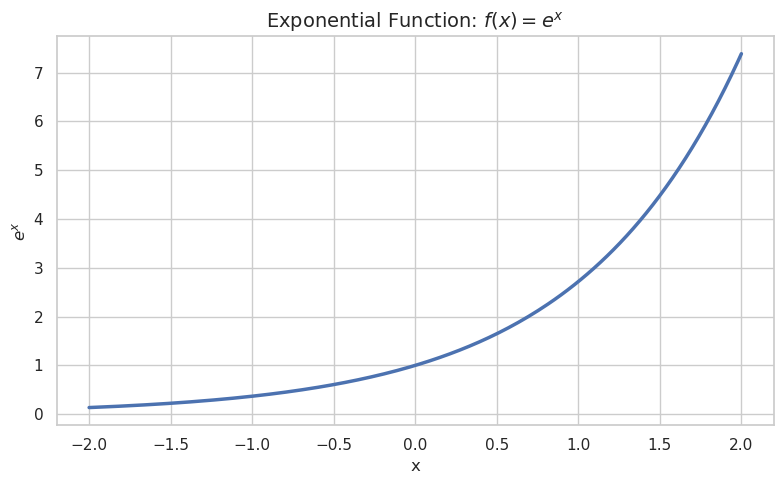

In [16]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Generate data
x = np.linspace(-2, 2, 200)
y = np.exp(x)
df = pd.DataFrame({'x': x, 'exp(x)': y})

# Create the plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='x', y='exp(x)', linewidth=2.5)

# Styling
plt.title(r"Exponential Function: $f(x) = e^x$", fontsize=14)
plt.xlabel("x")
plt.ylabel(r"$e^x$")
plt.tight_layout()

# Show the plot
plt.show()

## Natural Logarithm
- The **natural logarithm** is defined by the functional relation $\ln(xy) = \ln(x) + \ln(y)$: It converts multiplication to addition
- The derivative of $\ln(x)$ is $1/x$
- The exponential and natural logarithm are inverses: $e^{\ln(x)}=x$ and $\ln(e^{x}) = x$.
- People often use $\log$ for the natural log
- Exercise: If $L = e^{-f_1} * e^{-f_2} * ... * e^{-f_n}$, then what is $\ln(L)$? We'll use this often.

/tmp/ipykernel_6483/606690023.py:6: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


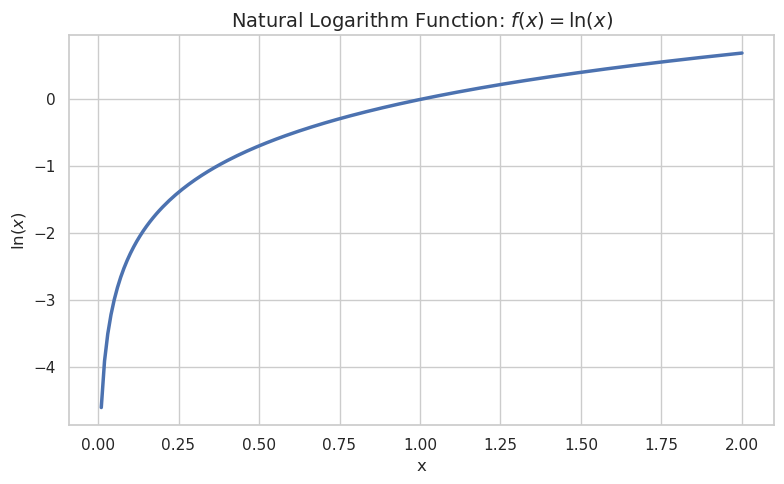

In [17]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Generate data
x = np.linspace(0, 2, 200)
y = np.log(x)
df = pd.DataFrame({'x': x, 'ln(x)': y})

# Create the plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='x', y='ln(x)', linewidth=2.5)

# Styling
plt.title(r"Natural Logarithm Function: $f(x) = \ln(x)$", fontsize=14)
plt.xlabel("x")
plt.ylabel(r"$\ln(x)$")
plt.tight_layout()

# Show the plot
plt.show()

## Inverse Hyperbolic Sine
- As data scientists, we often need a function that is very similar to natural log... but not quite natural log
- In particular, $\lim_{x \rightarrow 0} \ln(x) = \infty$ and $\ln$ is undefined for negative numbers; this is inconvenient. Many datasets have a lot of zeros, along with some positive values. We don't want to throw away zeros just to use $\ln$
- Often, a better alternative is **inverse hyperbolic sine**
$$
i(x) = \ln \left( x + \sqrt{1+x^2} \right)
$$
- This is defined for positive and negative values, $i(0)=0$, and
$$
i'(x) = \dfrac{1}{\sqrt{1+x^2}},
$$
which is almost $1/|x|$, similar to the natural logarithm.

/tmp/ipykernel_6483/4279323572.py:7: RuntimeWarning: invalid value encountered in log
  y_log = np.log(x)
/tmp/ipykernel_6483/4279323572.py:8: RuntimeWarning: invalid value encountered in log
  y_neg_log = -np.log(-x)


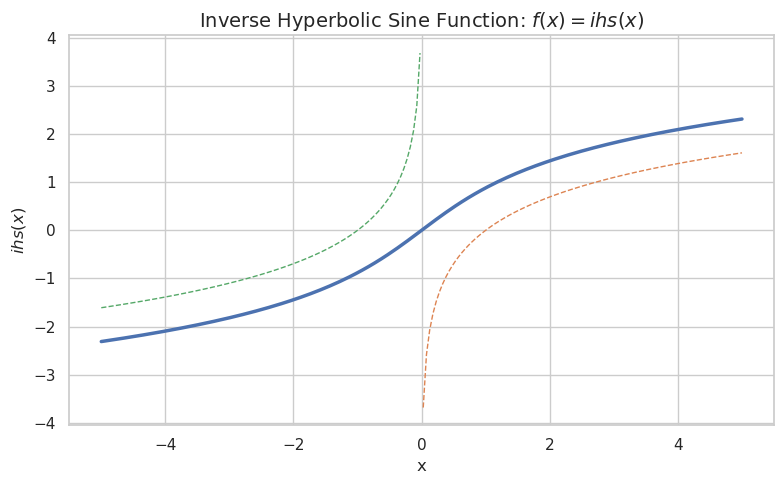

In [18]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Generate data
x = np.linspace(-5, 5, 200)
y = np.arcsinh(x)
y_log = np.log(x)
y_neg_log = -np.log(-x)
df = pd.DataFrame({'x': x, 'i(x)': y, 'log(x)':y_log, '-log(-x)':y_neg_log})

# Create the plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='x', y='i(x)', linewidth=2.5)
sns.lineplot(data=df, x='x', y='log(x)', linewidth=1, linestyle='dashed')
sns.lineplot(data=df, x='x', y='-log(-x)', linewidth=1, linestyle='dashed')


# Styling
plt.title(r"Inverse Hyperbolic Sine Function: $f(x) = ihs(x)$", fontsize=14)
plt.xlabel("x")
plt.ylabel(r"$ihs(x)$")
plt.tight_layout()

# Show the plot
plt.show()

# The Gaussian Kernel
- We have a special function that involves the exponential, which we'll call the Gaussian kernel:
$$
\phi_h(z) = \frac{1}{\sqrt{2\pi}h} e^{-z^2/2h^2}
$$
where $h>0$
- Exercise: What value of $z$ maximizes $\phi$? For what values of $z$ is it increasing or decreasing? Plot it, holding $h$ constant. What happens as we vary $h$? As $h \rightarrow 0$ or $h \rightarrow \infty$? Plot it. What's the natural logarithm of the Gaussian kernel?

# The Logistic Function
- Consider the logistic function:
$$
L(z) = \dfrac{e^{z}}{1+e^{z}} = \dfrac{1}{1+e^{-z}}
$$
- Exercise: Show that $L'(z) = L(z)(1-L(z))$
- Exercise: Plot $L'(z)$ and the Gaussian kernel. How do they compare?

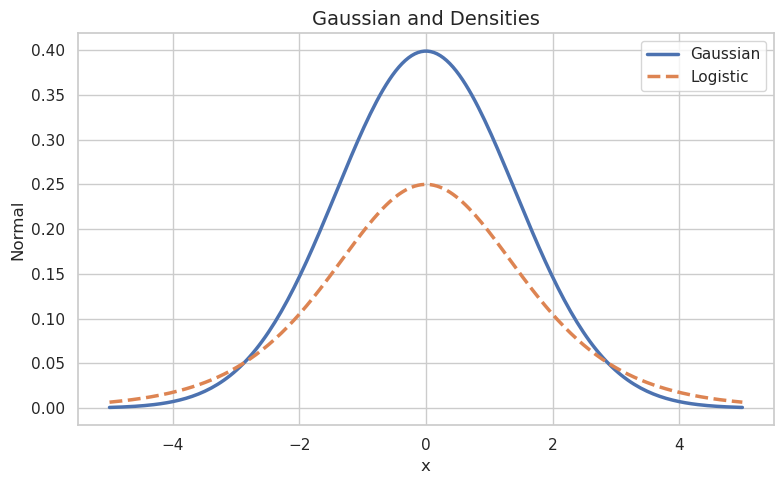

In [ ]:

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Generate data
x = np.linspace(-5, 5, 200)
y_normal = np.exp( -(x/2)**2)/np.sqrt(2*np.pi)
L = 1/(1+np.exp(-x))
y_logistic = L * (1-L)

df = pd.DataFrame({'x': x, 'Normal': y_normal, 'Logistic':y_logistic})

# Create the plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='x', y='Normal', label='Gaussian')
sns.lineplot(data=df, x='x', y='Logistic', linestyle='dashed', label='Logistic')

# Styling
plt.title(r"Gaussian and Densities", fontsize=14)
plt.xlabel("x")
plt.tight_layout()

# Show the plot
plt.show()

# 4. Sequences and Series

## Sequences
- In the special case when a function maps $\mathbb{N} \rightarrow \mathbb{R}$, we call it a **sequence**
- To each natural number, we assign a real number
- We usually write sequences as $x_n$, rather than $f(n)$
- Eventually, we will be interested in **stochastic sequences** that evolve randomly over time: Stock prices, patient health status, etc.

## Examples of Sequences

| $x_n$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | $x_6$ | $...$ |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| $n$ |  1 | 2 | 3 | 4 | 5 | 6 |...|
| $2n$ |  2 | 4 | 6 | 8 | 10 | 12 | ... |
| $2n-1$ | 1 | 3 | 5 | 7 | 9 | 11 | ... |
| $x_n = x_{n-1} + x_{n-2}$| 0 | 1 | 1 | 2 | 3 | 5 |  ... |
| $n(n+1)/2$ | 1 | 3 | 6 | 10 | 15 | 21 |...|
| $1/n$ | 1/1 | 1/2 | 1/3 | 1/4 | 1/5 | 1/6 | ... | 
| $-1^{n}/n$ |  -1 | +1/2 | -1/3 | +1/4 | -1/5 | +1/6 | ... | 
| $\cos(\frac{\pi n}{2})$ | 0 | -1 | 0 | 1 | 0 | -1 | ... | 



## Exercise
- Write a function or class that takes a sequence like $1/n$ and plots it for $1,...,N$ values
- Do you recognize any of these sequences? If so, what are they?
- Visualize the sequences in the previous table. What do their limits appear to be, or do they appear to diverge?

## Convergence of a Sequence
- Everyone's favorite sequence is $x_n = \frac{1}{n} $
- We say a sequence $x_n$ **converges to $\bar{x}$** if $|x_n - \bar{x}|$ gets arbitrarily close to zero as $n$ gets arbitrarily large. 
- If there is no such $\bar{x}$, then the sequence **diverges**.
- The sequence might never arrive at its limit, but as $n$ gets large, we get closer and closer to something. That "something" is the limit.
- How does this work for $1/n$? It seems like $1/n$ converges to zero.
    1. Tell me how close to zero you want $x_n$ to be; call it $e$ for error
    2. Then I need $|1/n - 0 | < e$
    3. Inverting this inequality, I get $n > 1/e$.
    Therefore, "For any $e>0$, if $ n > 1/e$, then $|1/n - 0| < e$, and therefore $1/n$ converges to zero."
- Remember, integrals and derivatives are limits: Limits are everywhere and you use them all the time
- Random phenomena don't have deterministic limits: We'll be investigating different ways of describing long-run behavior

## Exercises
- Plot these sequences and investigate their convergence:
    - Show that $x_n = 1- 1/n$ converges to 1
    - Show that $x_n = \frac{n}{n+1}$ converges to 1
    - Show that $x_n = -1^n/n$ converges to 0
    - Show that $x_n = \sin(n)/n$ converges to 0
    - Show that if $ 0 < a < 1 $, then $x_n = a^n \rightarrow 0 $
- Hint: The argument that $1/n \rightarrow 0$ can be adapted to solve most of these: Try to use the absolute value and definition of a limit to "round up" to $1/n$
- Show that if $x_n \rightarrow \bar{x}$ and $y_n \rightarrow \bar{y}$, then $ x_n + y_n \rightarrow \bar{x} + \bar{y}$ (Hint: flip back to the slide on absolute value)
- Let 
    $$
    f_n(x) = \dfrac{n}{\sqrt{2\pi}} e^{-n^2x^2/2}
    $$ 
    As $n \rightarrow \infty$, how does $f_n(x)$ behave for each $x$? Try plotting the sequence as $n$ increases to get some intuition.
- Can you create vector spaces in which a vector is a sequence? How?

## Series and Products
- Sometimes, we construct sequences by aggregating terms through summation notation (e.g. sum of squared error)
$$
x_1 + x_2 + x_3 + ... + x_N = \sum_{i=1}^N x_i
$$
or product notation (e.g. the likelihood function)
$$
x_1 * x_2 * ... * x_N = \prod_{i=1}^N x_i.
$$
- Exercise: What is $
1 + 2 + ... + N = \sum_{i=1}^N i
$? (Hint: Answer is $N(N+1)/2$, but why?)
- Exercise: What is $ S = 1 + x + x^2 + x^3 + ... + x^L = \sum_{i = 0}^L x^i$? If $L \rightarrow \infty$, when is the limit defined? (Hint: Multiply $S$ times $x$ and subtract, and solve for $S$)

## Random Sequences, Stochastic Processes, etc.
- The last few slides were just a quick review of classical sequences used in mathematical analysis: There's a game, it has rules, we show things are true
- We will want to understand **sequences of random variables**
    - The sample mean is given by $ \bar{x}_n = \frac{1}{n} \sum_{i=1}^n x_i $, where the $x_i$ are randomly drawn from some distribution. What does it mean for it to "converge" as $n$ gets large?
    - There's a process where the next value $x_{t+1}$ only depends on the current value $x_t$, and there's only a finite number of values the process might take. Does it have a stable long-run distribution?
    - We're running a clinical trial/an experiment on an ecommerce platform to pick prices. How many patients/customers do we need to test to know we're getting a real effect?

# 5. Vector Spaces

## Vector Spaces
- A **vector** is a point in a direct product, like $(-1,5, 11) \in \mathbb{R} \times \mathbb{R} \times \mathbb{R} = \mathbb{R}^3$
- The concept of a **real vector space** takes the direct product $\mathbb{R}^N$, and adds vector operations on top of it like addition, substraction, and scalar multiplication, which are commutative and associative
- You can take whole courses on vector spaces, typically called **linear algebra** or **functional analysis**. We don't want to get too deep into this topic. We just want to appreciate that you shouldn't take something like
$$
2 \left[ \begin{array}{c} 1 \\ -2 \\ 12\end{array} \right] - \left[ \begin{array}{c} 2 \\ -3 \\ 5\end{array} \right] = \left[ \begin{array}{c} 0 \\ -3 \\ 7\end{array} \right]
$$
for granted
- So, I cannot overstate this: Vector Spaces are the core of everything you probably came here wanting to learn
    - Data Features/Variables are conceptualized as vectors; datasets/dataframes are combinations of stacked vectors called matrices or tensors
    - Computer vision and natural language processing roughly build an impractically large vector space (the whole image, the whole text), and then use data reduction techniques to simplify things down to a manageable scale (Principal Components Analysis, Convolutional Neural Networks, Autoencoders)
    - Many of our most power algorithms use the structure of the vector space to generate their results (e.g. least-squares regression, support vector machines, principal components analysis, ...)

## Transpose
- If $x = [x_1, ..., x_N]$ is a row vector, then 
$$
x^{\top} = \left[ \begin{array}{c} x_1 \\ \vdots \\ x_N \end{array} \right]
$$
is a column vector, and vice versa.
- Software typically doesn't track this, and treats all vectors as... vectors, while most math topics treat everything as a column vector
- When you start mixing and matching vectors, matrices, and tensors, it can become frustrating to track whether and how all the objects fit together (or don't); you often have to `.reshape` or `.squeeze` to get calculations to work

## Abstract Vector Space Definition
**For the record**, a **vector space** is a set of vectors $V$ where, for each $v, w, u \in V$, and each $a,b \in \mathbb{R}$,

- Associativity and commutativity of vector addition: $(u+v)+w = u+(v+w)$, $u+v = v+u$
- Zero vector element: There is a vector $0 \in V$ so that $0 + v = v$, for all $v \in V$
- Inverse elements: For any $v$, there is a $-v$ so that $v + (-v) = 0$
- Associativity of scalar multiplication: $(ab)v = a(bv)$ and 
- Identity scalar element: $ 1 \times v = v$
- Distributivity of scalar multiplication: $a(u+v) = au + av$ and $(a+b)v = av + bv$

Basically, the vector arithmetic that you expect to be able to do is possible


## Exercises
Describe how to turn the following sets into vector spaces:
- An $n$-fold direct product of $\mathbb{R}$, $\mathbb{R}^n$ (spaces of variables)
- Polynomials of fixed degree with real coefficients (spaces of linear models), like $f(x) = a_0 + a_1 x + a_2 x^2 + ... + a_L x^L$
- All functions mapping a set $X$ into a set $Y$ of real numbers: $f: X \rightarrow \mathbb{R}$

## The Inner Product
We are typically interested in (Euclidean) **inner product spaces**, which is a vector space equipped with an **inner product**:
$$
x \cdot y = \sum_{i=1}^N x_i y_i = \langle x,y \rangle = x^{\top}y
$$
This is a function that maps vectors into a scalar. This simultaneously creates lengths,
$$
\sqrt{x \cdot x} = \sqrt{\sum_{i=1}^N x_i^2 } = ||x||
$$
and angles,
$$
\cos( \theta_{x,y}) = \dfrac{x \cdot y}{||x|| \times ||y||}
$$
and distances,
$$
d(x,y) = \sqrt{ (x-y) \cdot (x-y) } = ||x-y||.
$$

## Exercises
- Take two variables $X = (x_1, ..., x_N)$ and $Y = (y_1, ..., y_N)$. Show that the statistical correlation,
$$
\dfrac{\dfrac{1}{N} \sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{\sigma_X \sigma_Y}
$$ \
is the angle between $X$ and $Y$: Correlations are statistical angles

- Hyperplanes are sets $H_b = \{ x : x \cdot b = 0 \}$. Sketch a hyperplane in two dimensions. What do they look like in three dimensions? Show that hyperplaces are **convex**: If $x_1$ and $x_2$ are in $H_b$, then $\lambda x_1 + (1-\lambda)x_2$ is in $H_b$, for all $\lambda \in [0,1]$

- For linear regression where $\hat{y} = x \cdot \beta$, show that the OLS estimator satisfies $x \cdot r = 0$, where $r = (y-b\cdot \beta)$. These are called "orthogonality conditions" and are one way to define regression.

- There are vector spaces of functions, where a "vector" is a function like $v = ax^2+5$ or $w=e^x$ over a fixed domain. How might you define an inner product on such spaces?

## Solving Linear Equations
- We are often faced with this kind of problem:
$$
\begin{alignat*}{2}
5 &=& 3x - y \\
-1 &=& -x + 7y \\
\end{alignat*}
$$
This is an example of a **system of linear equations**
- We are extremely interested in solving such systems
- Exercise: Solve the system for $x$ and $y$

## Matrices
- People realized you could economize on the bookkeeping of solving that system by rewriting just the coefficients:
$$
\underbrace{\left[ \begin{array}{cc} 3 & -1 \\ -1 & 7 \end{array} \right]}_{\text{Matrix, $A$}} \left( \begin{array}{c} x_1 \\ x_2 \end{array}\right) = \underbrace{\left( \begin{array}{c} 5 \\ -1 \end{array}\right)}_{\text{Vector, $b$}}
$$
- Or more generally as
$$
Ax = b
$$
- Probably the most famous example is Ordinary Least Squares:
$$
\underbrace{X^{\top}X}_{\text{VCV matrix of regressions}} \quad \underbrace{\beta}_{\text{Optimal weights}} = \underbrace{X^{\top} y}_{\text{Covariance of features and target}}
$$

## Matrices
- Linear maps $A$ from a vector space $V = \mathbb{R}^N$ to a vector space $W = \mathbb{R}^L$ can be represented by a matrix in $\mathbb{R}^{N \times L}$,
$$
A = \left[ \begin{array}{cccc} a_{11} & a_{12} & \cdots & a_{1L} \\ a_{21} & a_{22} & \cdots & a_{2L} \\ \vdots & \vdots & \ddots & \vdots \\ a_{N1} & a_{N2} & \cdots & a_{NL} \end{array}\right]
$$
- Let $A_{r:}$ be the $r$-th row of $A$, $[a_{r1}, ..., a_{rL}]$, and $A_{:c}$ be the $c$-th column, $[a_{1c}, ..., a_{Nc}]^{\top}$
- They can also be written in terms of the inner product, yielding the standard "row times column" calculation:
$$
Ax = \left[ \begin{array}{c} A_{1:} \\ A_{2: } \\ \vdots \\ A_{N:} \end{array} \right] x = \left[ \begin{array}{c} A_{1:}\cdot x \\ A_{2: }\cdot x \\ \vdots \\ A_{N:}\cdot x \end{array} \right] 
$$

## Matrix Inverse
- Solving a system of linear equations, $Ax = b$, is the same thing as inverting a matrix, $A^{-1}b = x^*$, when it is possible to solve the system
- On the computer, try very hard to avoid actually computing an inverse using `np.linalg.inv(A)`; instead, use `np.linalg.solve(A, b)` to solve the system of equations

## Quick Linear Regression Example
- Linear regression is a tool where we model the response variable $y$ as a linear function of features or covariances $X$, so $y = b \cdot X$
- The sum of squared error is
$$
SSE(b) = (y-b \cdot X)^{\top} (y - b \cdot X)
$$
- The solution is characterized by the normal equations,
$$
X^{\top}X \hat{b} = X^{\top}y 
$$
- We want to solve for $\hat{b}$ so we can make predictions $\hat{y} = \hat{b} \cdot x$

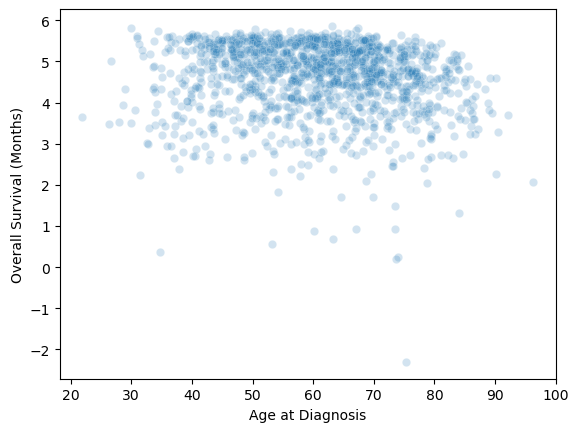

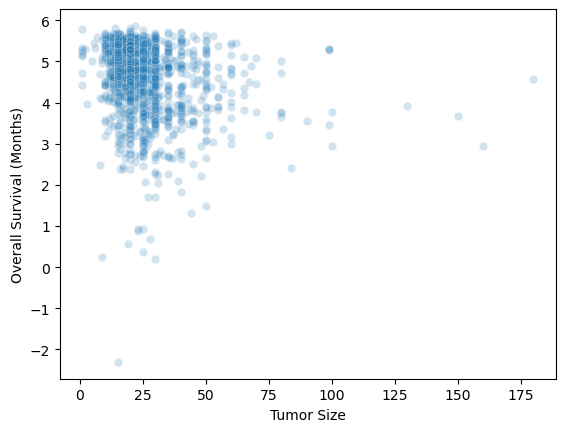

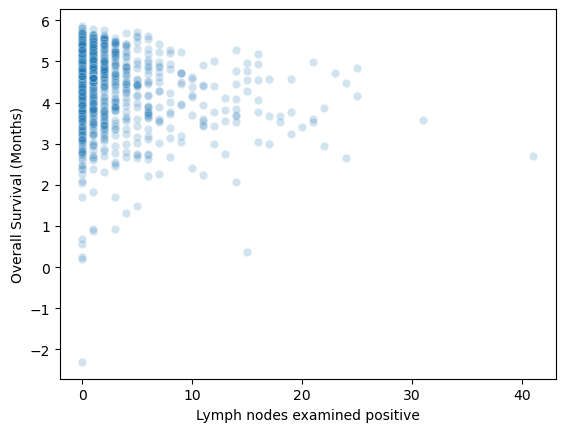

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/metabric.csv') # Load data

vars = ['Age at Diagnosis', 'Tumor Size', 'Lymph nodes examined positive'] # Vars we'll use

y = np.log(df['Overall Survival (Months)']) # Response
X = df.loc[:, vars] # Covariates

for v in vars:
    sns.scatterplot(data=df, x=v,y=y,alpha = .2)
    plt.show()

In [8]:
## Using Scikit-learn:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-0.00697674 -0.00717909 -0.04820186]
Intercept: 5.28572602427483


In [10]:
## Using Statsmodels:

import statsmodels.api as sm
import statsmodels.formula.api as smf

X_mat = sm.add_constant(X)   # adds intercept column named 'const'
model = sm.OLS(y, X_mat).fit()
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Overall Survival (Months)   R-squared:                       0.090
Model:                                   OLS   Adj. R-squared:                  0.088
Method:                        Least Squares   F-statistic:                     44.10
Date:                       Mon, 25 Aug 2025   Prob (F-statistic):           3.57e-27
Time:                               13:16:06   Log-Likelihood:                -1664.5
No. Observations:                       1343   AIC:                             3337.
Df Residuals:                           1339   BIC:                             3358.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [13]:
## Using just NumPy:

XpX = X_mat.T @ X_mat
Xpy = X_mat.T @ y
np.linalg.solve(XpX, Xpy)

array([ 5.28572602, -0.00697674, -0.00717909, -0.04820186])

## Linear Maps on Vector Spaces
- Say you have two real vector spaces, $V = \mathbb{R}^N$ and $W = \mathbb{R}^L$, each with standard vector addition and scalar multiplication
- A function $A$ is a **linear mapping** from $V$ into $W$ if, for all $v \in V$ and all $w \in W$,
$$
A(v_1+v_2) = A(v_1)+A(v_2) = w_1 + w_2
$$
and for a scalar $s$,
$$
A(sv) = sA(v) = sw
$$
- Then if $A$ is a linear map, we can write
$$
A(c_1 v_1 + c_2 v_2 + ... + c_J v_J) = c_1 A(v_1) + c_2 A(v_2) + ... + c_J A(v_J) = \sum_{j=1}^J c_j w_j
$$
- Linear maps are why we like GPUs: They are designed to do these kinds of calculations blisteringly quickly

## Tensors
- Did you see how we identified a linear map $A$ with a matrix?
- A **tensor** is a generalization of that concept: Tensors are multi-linear maps on vector spaces (if you confine calculations to a single dimension, the calculations are linear)
- In CS, a tensor is typically understood to be a multi-dimensional array: A matrix with dimensions $L_1 \times L_2 \times ... \times L_R$
- Many data are naturally tensors: Images with height/width/intensity, sound over time, and so on
- Neural networks use tensors extensively (e.g. PyTorch, TensorFlow, Keras)

In [23]:
rng = np.random.default_rng(100) 
shape = (2, 3, 4) # (depth, rows, cols)

arr_uniform = rng.random(shape)
print(arr_uniform)
#arr_normal = rng.standard_normal(shape)
#print(arr_normal)
#arr_ints = rng.integers(low=0, high=100, size=shape, dtype=np.int64)
#print(arr_ints)


[[[0.83498163 0.59655403 0.28886324 0.04295157]
  [0.9736544  0.5964717  0.79026316 0.91033938]
  [0.68815445 0.18999147 0.98147898 0.28474005]]

 [[0.62927317 0.58103648 0.59991227 0.53524811]
  [0.9957771  0.50194608 0.77102258 0.49416178]
  [0.99767449 0.97862192 0.39356804 0.32192526]]]


## Conclusion
- These topics -- logic, set theory, functions, sequences and series, vector spaces -- are the foundations of applied math
- The biggest return on your investment is functions and vector spaces, but understanding basic facts about sequences and series will make your journey easier and more natural